In [2]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

# for reproducibility
torch.manual_seed(1)

In [154]:
image_size = 28

dataset = datasets.ImageFolder(root='../',
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.Grayscale(num_output_channels=1),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

In [317]:
batch_size = 128




dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)

In [318]:
ngpu = 1
device = 'cuda'

In [319]:
imgs = next(iter(dataloader))


In [320]:
imgs[0].shape

torch.Size([128, 1, 28, 28])

In [321]:
torch.cuda.current_device()
import numpy as np

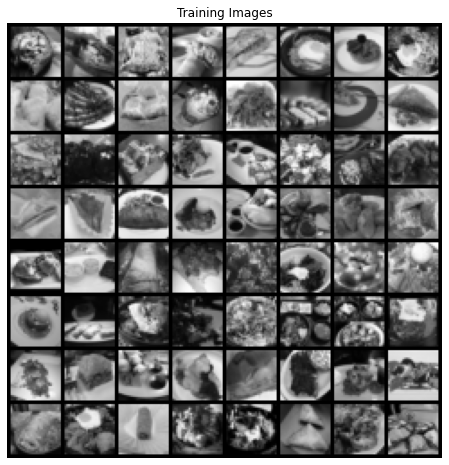

In [322]:
import torchvision.utils as vutils
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [339]:
class Generator(nn.Module):
    def __init__(self, hidden_dim, noise_dim, img_dim):
        super(Generator, self).__init__()
        self.map1 = nn.Linear(noise_dim, hidden_dim)
        self.map2 = nn.Linear(hidden_dim, hidden_dim*4)
        self.map3 = nn.Linear(hidden_dim*4, hidden_dim*8)
        self.map4 = nn.Linear(hidden_dim*8, img_dim)
        self.map5 = nn.Sigmoid()
        
    def forward(self, noise):
        x = self.map1(noise)
        x = self.map2(x)
        x = self.map3(x)
        x = self.map4(x)
        x = self.map5(x)
        
        return x
        
    

In [340]:
class Discriminator(nn.Module):
    def __init__(self, img_dim, hidden_dim, slope):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            
            nn.Linear(img_dim, hidden_dim*16),
            nn.BatchNorm1d(hidden_dim*16),
            nn.LeakyReLU(slope),
            
            nn.Linear(hidden_dim*16, hidden_dim*8),
            nn.BatchNorm1d(hidden_dim*8),
            nn.LeakyReLU(slope),
            
            nn.Linear(hidden_dim*8, hidden_dim*4),
            nn.BatchNorm1d(hidden_dim*4),
            nn.LeakyReLU(slope),
            
            nn.Linear(hidden_dim*4, 1),
        )
    def forward(self, image):
        return self.disc(image)

In [341]:
def get_noise(n_samples, noise_dim, device='cpu'):
    noise = torch.randn(n_samples, noise_dim, device=device)
    return noise

In [342]:
noise_dim = (128, 100)

In [343]:


# Set your parameters
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001



In [344]:
gen

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

In [345]:
gen

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

gen = Generator(hidden_dim = 128, noise_dim = z_dim, img_dim = 784).to(device=device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)

disc = Discriminator(img_dim = image_size, hidden_dim = 128, slope = 0.2).to(device=device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [346]:
gen = Generator(hidden_dim=128, noise_dim=10, img_dim=image_size*image_size).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator(img_dim=image_size*image_size, hidden_dim=128, slope=0.2).to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [347]:
image_size

28

In [348]:
## DEFINING DISCRIMINATOR AND GENERATOR LOSS

In [349]:
def get_disc_loss(gen, disc, criterion, real_images, num_images, z_dim, device):
    '''
    gen = generator
    disc = discriminator
    criterion = loss function
    real_images = batch of real images
    num_images = number of image the generator is supposed to generate
    z_dim = noise dimension
    device = cuda or cpu
    '''
    noise_vecs = get_noise(num_images, z_dim, device = device)
    fake_images = gen(noise_vecs)
    
    real_pred = disc(real_images)
    fake_pred = disc(fake_images.detach())
    
    loss_real = criterion(real_pred, torch.ones_like(real_pred))
    loss_fake = criterion(fake_pred, torch.zeros_like(fake_pred))
    
    disc_loss = (loss_real + loss_fake) /2
    return disc_loss

In [350]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    '''
    gen = generator
    disc = discriminator
    criterion = loss function
    real_images = batch of real images
    num_images = number of image the generator is supposed to generate
    z_dim = noise dimension
    device = cuda or cpu
    '''
    noise_vecs = get_noise(num_images, z_dim, device=device)
    fake_images = gen(noise_vecs)
    
    fake_pred = disc(fake_images)
    gen_loss = criterion(fake_pred, torch.ones_like(fake_pred))
    
    return gen_loss
    
    
    

In [351]:


import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [352]:

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''

    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()


import torchvision
batch_size = 64
dataloader = torch.utils.data.DataLoader( torchvision.datasets.MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)



  0%|          | 0/71 [00:00<?, ?it/s]

torch.Size([128, 784])


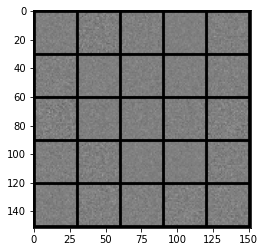

  1%|▏         | 1/71 [00:00<00:36,  1.94it/s]

torch.Size([128, 784])


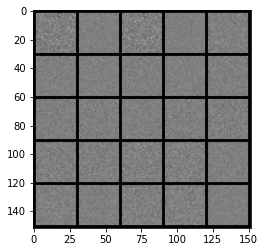

  3%|▎         | 2/71 [00:01<00:35,  1.93it/s]

torch.Size([128, 784])


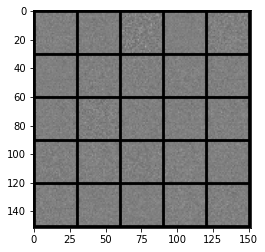

  4%|▍         | 3/71 [00:01<00:35,  1.93it/s]

torch.Size([128, 784])


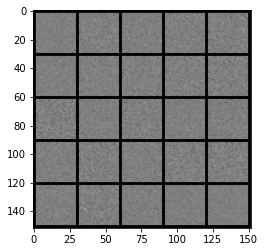

  6%|▌         | 4/71 [00:02<00:34,  1.92it/s]

torch.Size([128, 784])


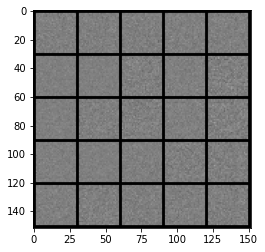

  7%|▋         | 5/71 [00:02<00:34,  1.92it/s]

torch.Size([128, 784])


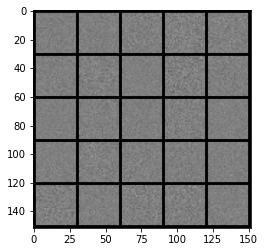

  8%|▊         | 6/71 [00:03<00:34,  1.89it/s]

torch.Size([128, 784])


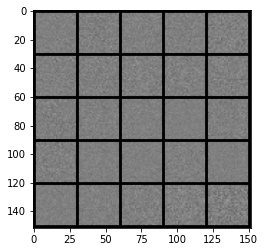

 10%|▉         | 7/71 [00:03<00:33,  1.89it/s]

torch.Size([128, 784])


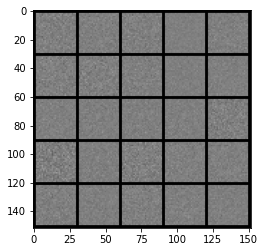

 11%|█▏        | 8/71 [00:04<00:33,  1.88it/s]

torch.Size([128, 784])


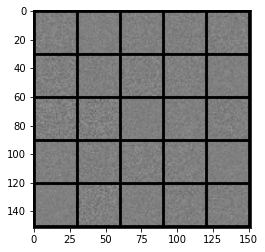

 13%|█▎        | 9/71 [00:04<00:34,  1.81it/s]

torch.Size([128, 784])


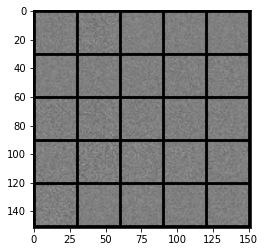

 14%|█▍        | 10/71 [00:05<00:33,  1.81it/s]

torch.Size([128, 784])


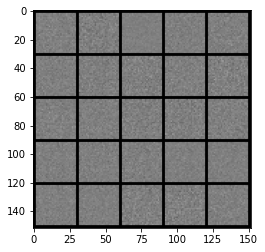

 15%|█▌        | 11/71 [00:05<00:33,  1.81it/s]

torch.Size([128, 784])


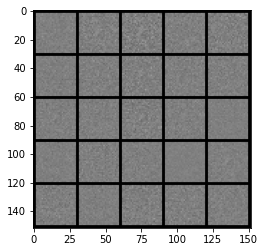

 17%|█▋        | 12/71 [00:06<00:32,  1.82it/s]

torch.Size([128, 784])


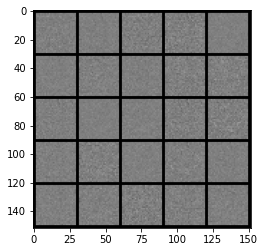

 18%|█▊        | 13/71 [00:07<00:31,  1.83it/s]

torch.Size([128, 784])


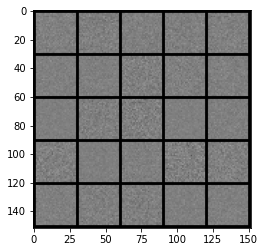

 20%|█▉        | 14/71 [00:07<00:30,  1.85it/s]

torch.Size([128, 784])


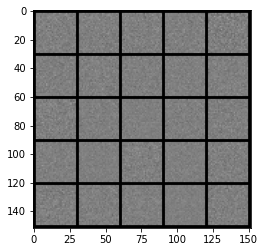

 21%|██        | 15/71 [00:08<00:30,  1.86it/s]

torch.Size([128, 784])


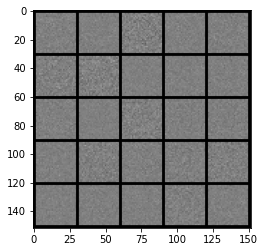

 23%|██▎       | 16/71 [00:08<00:29,  1.88it/s]

torch.Size([128, 784])


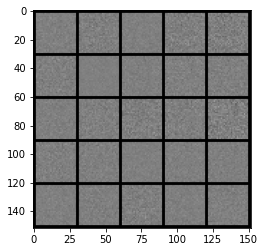

 24%|██▍       | 17/71 [00:09<00:28,  1.89it/s]

torch.Size([128, 784])


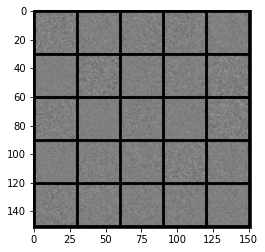

 25%|██▌       | 18/71 [00:09<00:27,  1.89it/s]

torch.Size([128, 784])


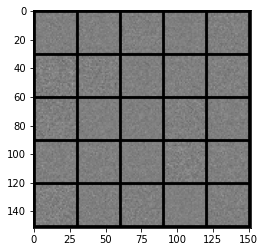

 27%|██▋       | 19/71 [00:10<00:27,  1.87it/s]

torch.Size([128, 784])


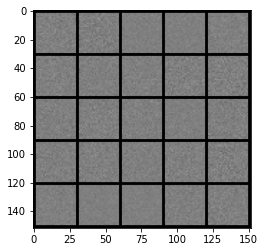

 28%|██▊       | 20/71 [00:10<00:27,  1.86it/s]

torch.Size([128, 784])


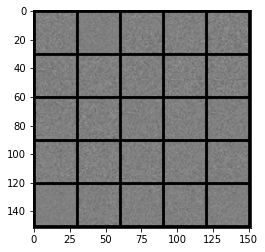

 30%|██▉       | 21/71 [00:11<00:27,  1.83it/s]

torch.Size([128, 784])


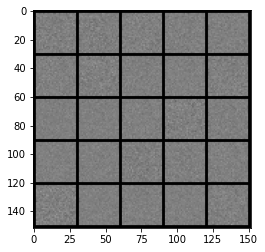

 31%|███       | 22/71 [00:11<00:26,  1.84it/s]

torch.Size([128, 784])


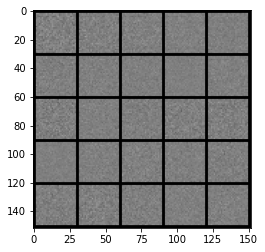

 32%|███▏      | 23/71 [00:12<00:25,  1.87it/s]

torch.Size([128, 784])


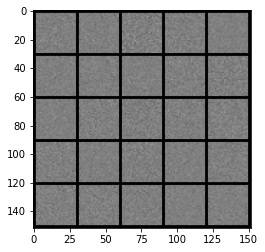

 34%|███▍      | 24/71 [00:12<00:24,  1.90it/s]

torch.Size([128, 784])


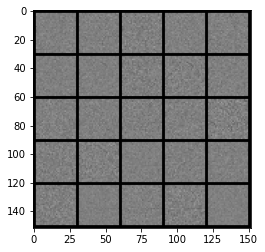

 35%|███▌      | 25/71 [00:13<00:24,  1.90it/s]

torch.Size([128, 784])


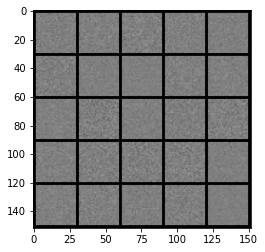

 37%|███▋      | 26/71 [00:13<00:23,  1.92it/s]

torch.Size([128, 784])


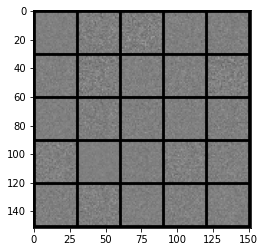

 38%|███▊      | 27/71 [00:14<00:22,  1.92it/s]

torch.Size([128, 784])


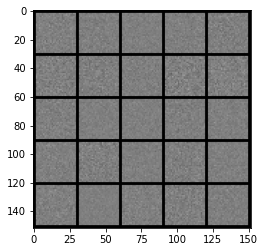

 39%|███▉      | 28/71 [00:14<00:22,  1.92it/s]

torch.Size([128, 784])


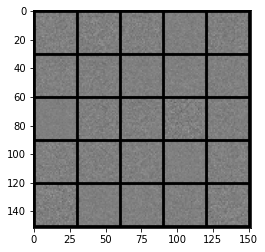

 41%|████      | 29/71 [00:15<00:21,  1.93it/s]

torch.Size([128, 784])


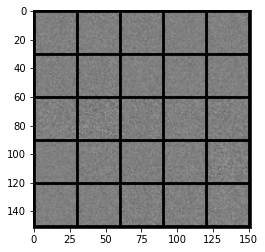

 42%|████▏     | 30/71 [00:15<00:21,  1.93it/s]

torch.Size([128, 784])


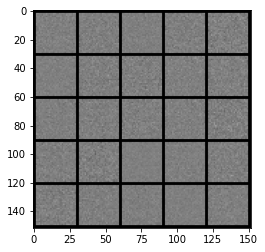

 44%|████▎     | 31/71 [00:16<00:21,  1.85it/s]

torch.Size([128, 784])


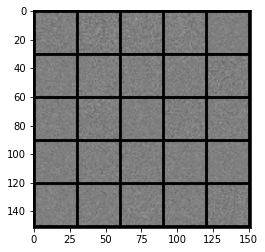

 45%|████▌     | 32/71 [00:17<00:20,  1.87it/s]

torch.Size([128, 784])


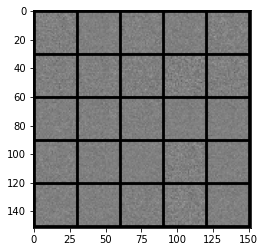

 46%|████▋     | 33/71 [00:17<00:20,  1.89it/s]

torch.Size([128, 784])


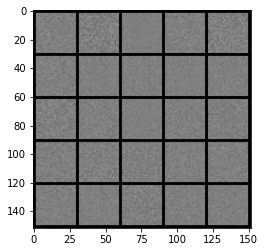

 48%|████▊     | 34/71 [00:18<00:19,  1.91it/s]

torch.Size([128, 784])


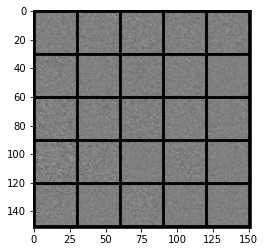

 49%|████▉     | 35/71 [00:18<00:18,  1.93it/s]

torch.Size([128, 784])


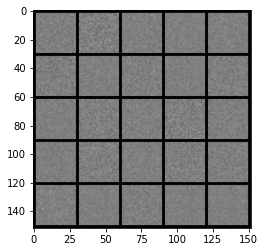

 51%|█████     | 36/71 [00:19<00:18,  1.94it/s]

torch.Size([128, 784])


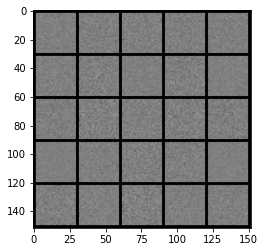

 52%|█████▏    | 37/71 [00:19<00:17,  1.93it/s]

torch.Size([128, 784])


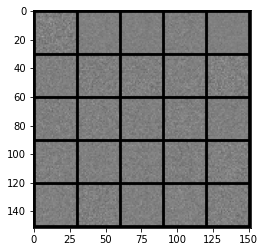

 54%|█████▎    | 38/71 [00:20<00:17,  1.91it/s]

torch.Size([128, 784])


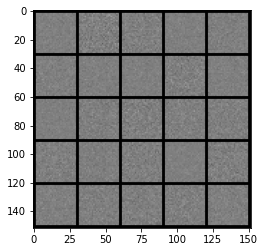

 55%|█████▍    | 39/71 [00:20<00:16,  1.91it/s]

torch.Size([128, 784])


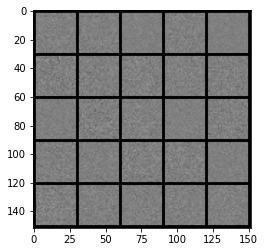

 56%|█████▋    | 40/71 [00:21<00:16,  1.88it/s]

torch.Size([128, 784])


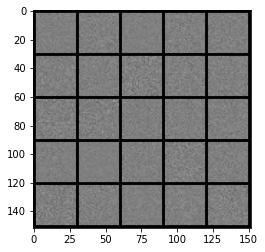

 58%|█████▊    | 41/71 [00:21<00:16,  1.86it/s]

torch.Size([128, 784])


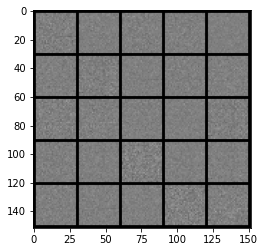

 59%|█████▉    | 42/71 [00:22<00:15,  1.86it/s]

torch.Size([128, 784])


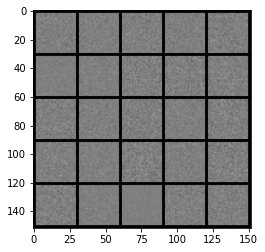

 61%|██████    | 43/71 [00:22<00:15,  1.87it/s]

torch.Size([128, 784])


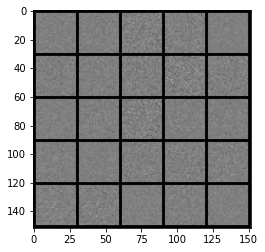

 62%|██████▏   | 44/71 [00:23<00:14,  1.88it/s]

torch.Size([128, 784])


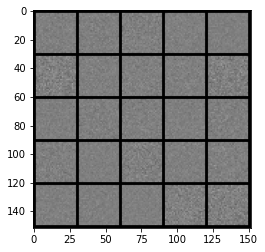

 63%|██████▎   | 45/71 [00:23<00:13,  1.90it/s]

torch.Size([128, 784])


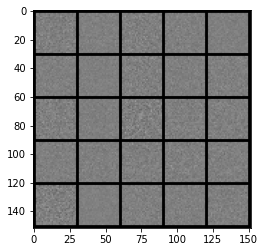

 65%|██████▍   | 46/71 [00:24<00:13,  1.91it/s]

torch.Size([128, 784])


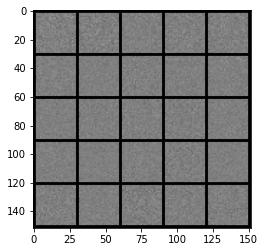

 66%|██████▌   | 47/71 [00:24<00:12,  1.93it/s]

torch.Size([128, 784])


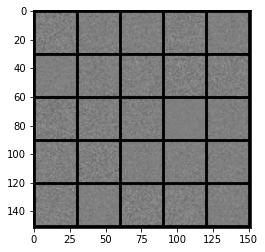

 68%|██████▊   | 48/71 [00:25<00:11,  1.93it/s]

torch.Size([128, 784])


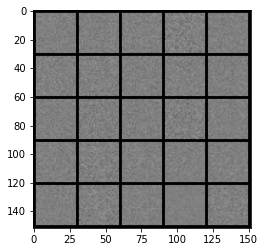

 69%|██████▉   | 49/71 [00:25<00:11,  1.92it/s]

torch.Size([128, 784])


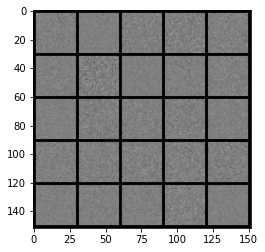

 70%|███████   | 50/71 [00:26<00:10,  1.92it/s]

torch.Size([128, 784])


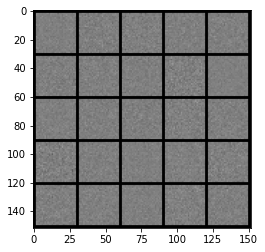

 72%|███████▏  | 51/71 [00:27<00:10,  1.92it/s]

torch.Size([128, 784])


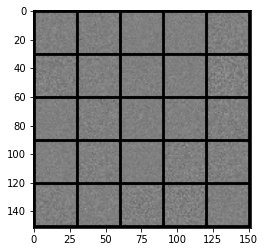

 73%|███████▎  | 52/71 [00:27<00:09,  1.92it/s]

torch.Size([128, 784])


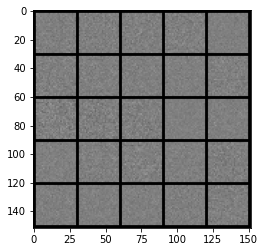

 75%|███████▍  | 53/71 [00:28<00:09,  1.84it/s]

torch.Size([128, 784])


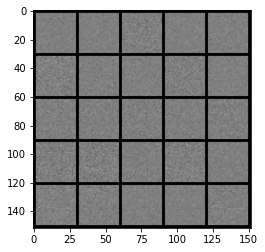

 76%|███████▌  | 54/71 [00:28<00:09,  1.87it/s]

torch.Size([128, 784])


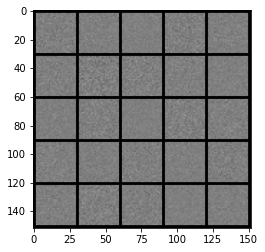

 77%|███████▋  | 55/71 [00:29<00:08,  1.88it/s]

torch.Size([128, 784])


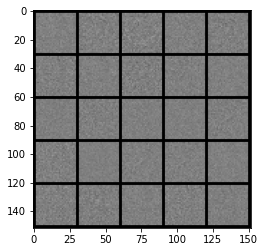

 79%|███████▉  | 56/71 [00:29<00:07,  1.88it/s]

torch.Size([128, 784])


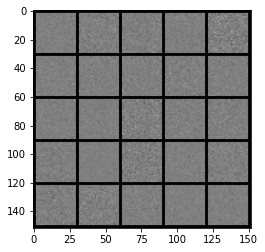

 80%|████████  | 57/71 [00:30<00:07,  1.88it/s]

torch.Size([128, 784])


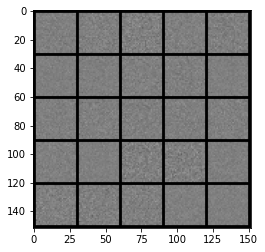

 82%|████████▏ | 58/71 [00:30<00:06,  1.88it/s]

torch.Size([128, 784])


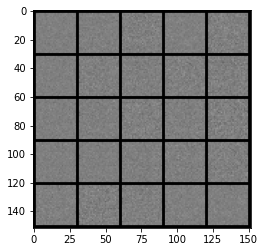

 83%|████████▎ | 59/71 [00:31<00:06,  1.88it/s]

torch.Size([128, 784])


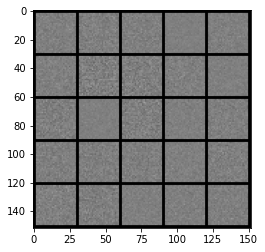

 85%|████████▍ | 60/71 [00:31<00:05,  1.87it/s]

torch.Size([128, 784])


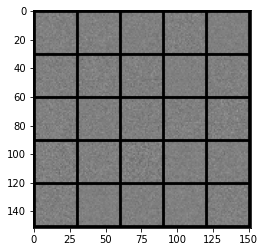

 86%|████████▌ | 61/71 [00:32<00:05,  1.88it/s]

torch.Size([128, 784])


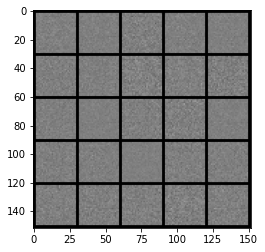

 87%|████████▋ | 62/71 [00:32<00:04,  1.88it/s]

In [ ]:
from tqdm import tqdm
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True # Whether the generator should be tested
gen_loss = False
error = False
n_epochs = 100
z_dim = 10
batch_size = 64

for epoch in range(n_epochs):
    
    
    for real,_ in tqdm(dataloader):
        
        curr_batch_size = len(real)
        
        # Flattening the batch 
        real = real.view(curr_batch_size, -1).to(device)
        print(real.shape)
        
        ##### UPDATE DISCRIMINATOR ######
        disc_opt.zero_grad()
        disc_loss = get_disc_loss(gen, disc, criterion, real, curr_batch_size, z_dim, device)
        disc_loss.backward(retain_graph=True)
        disc_opt.step()
        
        #### UPDATE GENERATOR ######
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, curr_batch_size, z_dim, device)
        gen_loss.backward(retain_graph=True)
        gen_opt.step()
        
        fake_noise = get_noise(curr_batch_size, z_dim, device=device)
        fake = gen(fake_noise)
        show_tensor_images(fake)
        
    

In [ ]:
def gen_block(input_dim, output_dim):
    '''This function will give a combined layer consisting of 
    1) Linear layer.
    2) Batch Regularization
    3) Relu'''
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True),
    )

In [ ]:
class Generator:
    '''This block defines the generator, which uses the gen_block function to declare layers'''
    def __init__(self, img_dim, hidden_dim, z_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            gen_block(z_dim, hidden_dim),
            gen_block(hidden_dim, hidden_dim*4),
            gen_block(hidden_dim*4, hidden_dim*8),
            gen_block(hidden_dim*8, hidden_dim*16),
            gen_block(hidden_dim*16, img_dim),
            nn.Sigmoid()
        )
    def forward(self, noise):
        return gen(noise)

In [ ]:
def disc_block(input_dim, output_dim, slope):
    '''This function will give a combined layer consisting of
    1) Linear layer
    2) Leaky Relu'''
    
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LeakyReLU(slope),
    )

In [ ]:
class Discriminator:
    '''This block defines the discriminator, which uses the disc_block function to declare layers'''
    def __init__(self, img_dim, hidden_dim, z_dim):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            disc_block(img_dim, hidden_dim*16),
            disc_block()
        )